(60000, 28, 28) uint8
(60000, 28, 28, 1) (10000, 28, 28, 1)
(256, 256)


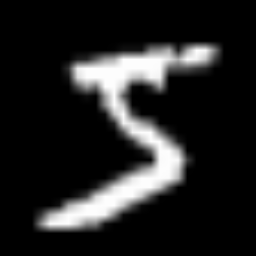

(60000,)
(60000, 10)


In [12]:
import tensorflow as tf
import tensorflow.keras

from keras.datasets import cifar10
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

#cifar10
#img_size =32
#ch =3

#mnist
img_size = 28
ch = 1

#Load pre_shuffled MNIST data into train and test sets
#(train_imgs, train_labels), (test_imgs, test_labels) = cifar10.load_data()
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

print(train_imgs.shape, train_imgs.dtype)

# reshape
train_imgs = train_imgs.reshape(train_imgs.shape[0], img_size, img_size, ch)
test_imgs = test_imgs.reshape(test_imgs.shape[0], img_size, img_size, ch)

print(train_imgs.shape, test_imgs.shape)

#RGB->BGR / mnist에 적용안됌(컬러)
train_imgs = train_imgs[..., ::-1]
test_imgs = test_imgs[..., ::-1]

import cv2
v_img = cv2.resize(train_imgs[0], (256,256), interpolation = cv2.INTER_LINEAR)
print(v_img.shape)
#colab에서 구동
from google.colab.patches import cv2_imshow
cv2_imshow(v_img)

#data형을 float32로 바꾸고 값의 범위는 [0,1]로
train_imgs = train_imgs.astype('float32')
test_imgs = test_imgs.astype('float32')
train_imgs /= 255
test_imgs /= 255

print(train_labels.shape) #(60000,)

#one hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print(train_labels.shape) #(60000,10)

Val_Imgs = train_imgs[40000:50000]
Val_Labels = train_labels[40000:50000]
Train_Imgs = train_imgs[:40000]
Train_Labels = train_labels[:40000]
Test_Imgs = test_imgs[:10000]
Test_Labels = test_labels[:10000]

In [14]:
#Keras cnn model
model = Sequential()
model.add(Conv2D(6,(3,3), activation ='relu', input_shape=(img_size, img_size, ch)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(16,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #overfit 방지
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

print('model fit...')
epoch = 50
history = model.fit(Train_Imgs, Train_Labels, batch_size = 512, epochs = epoch, 
                    validation_data = (Val_Imgs, Val_Labels))
score = model.evaluate(Test_Imgs, Test_Labels, verbose=0)
print("%.2f%%" %score[1]*100)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

[0.05363061651587486, 0.02003422938287258, 0.013223623856902122, 0.01030736230313778, 0.008959513157606125, 0.008070670068264008, 0.007211277727037668, 0.006731443107128143, 0.0062874131835997105, 0.005945692304521799, 0.005558686330914497, 0.005313809961080551, 0.0050234608352184296, 0.004895562306046486, 0.0046479846350848675, 0.00456981873139739, 0.0043251290917396545, 0.004305606242269278, 0.003984855487942696, 0.0040702493861317635, 0.003994631115347147, 0.0039663477800786495, 0.0038253471720963717, 0.003641516901552677, 0.0035375209990888834, 0.003535522148013115, 0.0033470329362899065, 0.0032798389438539743, 0.003270779037848115, 0.0033157391007989645, 0.0030962687451392412, 0.003228225279599428, 0.0031377351842820644, 0.002985293511301279, 0.002982022939249873, 0.002953379647806287, 0.002923780819401145, 0.0027856940869241953, 0.00279278215020895, 0.0027596529107540846, 0.0028262592386454344, 0.0027009034529328346, 0.002655409276485443, 0.002588634379208088, 0.00255988817662000

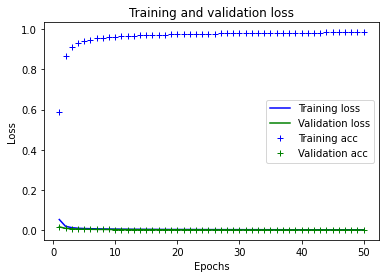

In [15]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print(loss_values)
print(val_loss_values)

epochs = range(1, epoch+1)
from matplotlib import pyplot as plt
plt.plot(epochs, loss_values, 'b-', label='Training loss')
plt.plot(epochs, val_loss_values, 'g-', label='Validation loss')
plt.plot(epochs, acc_values, 'b+', label='Training acc')
plt.plot(epochs, val_loss_values, 'g+', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()